# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

Hanna Svenson (jda6qt)

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

A model is linear if the relationship between the x and y variable can be represented in a straight line. 


2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

If the intercept is included in the model, the coefficient tells you how much the outcome of the variable changes from the baseline of the reference category. Otherwise, the coefficient directly represents the outcome the the category without comparing it to the baseline. 


3. Can linear regression be used for classification? Explain why, or why not.

Linear regression is designed for continuous outcomes rather than discrete ones, so it would likely return values that are outside of the accepted classified groups. 


4. What are signs that your linear model is over-fitting?

It is a sign if the model uses too many variables and tries to exploit minor relationships it finds in the training data. This can result in high accuracy with the training data but poor performance with test data.


5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multicolinearity occers when predictors are highly correlated, which makes it hard to identify the effects of 1 predictor on its own. Two stage least squares addresses this by replacing these predictors with new variables that are not correlated with eachother, allowing us to look at effects separately.


6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?

We can take logarithms of variables to capture certain relationships. We can also take an interaction term, for example new variable c = existing variable a x existing variable b.


7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

The intercept represents the baseline of our data. It is the predicted "output" when all predictors in the model are 0. 

Slope represents the rate of change in the response variable as the predictor variable changes. 

The coefficient of a dummy variable represents how the outcome variable differs for that dummy variable differs from the baseline (or the direct outcome depending on whether the slope is included).


**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

Manhattan has the highest mean price of $183.66.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('./data/Q1_clean.csv')
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

Text(0.5, 1.0, 'Price')

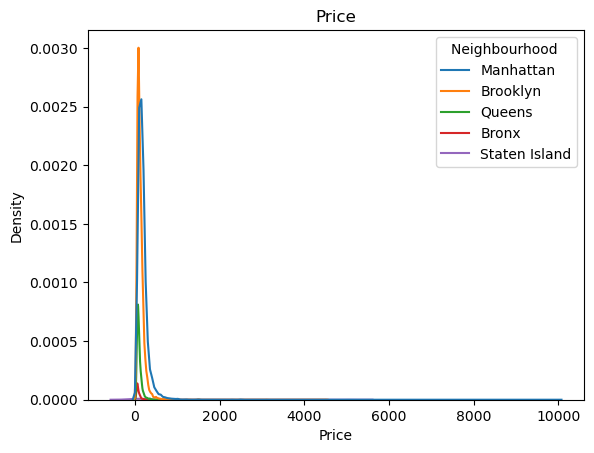

In [8]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood ']).set_title("Price")

[Text(0.5, 1.0, 'log Price'), Text(0.5, 0, 'log Price')]

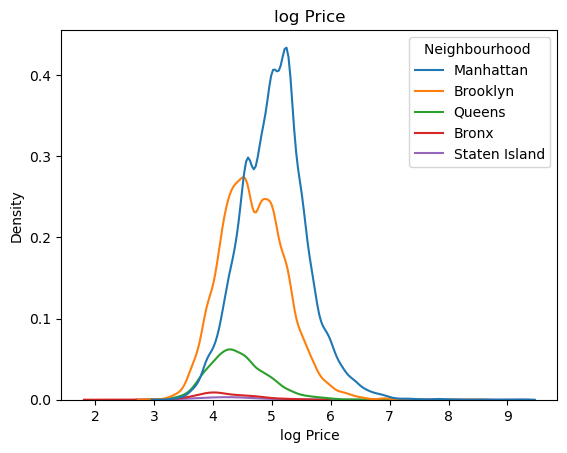

In [12]:
sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood ']).set(title = "log Price", xlabel = "log Price")

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

The coefficients are the same as the neighborhood price means from question 1. 


In [17]:
# Target Variable
y = df['Price']

# Brand Dummy:
X_d = pd.get_dummies(df['Neighbourhood '],dtype='int') # Create brand dummies

# Regresion:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, y)) # R squared measure
results

R-squared:  0.04631389606035197


,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

The first neighborhood was dropped and used as the baseline reference. The new coefficients of the neighborhoods are relative to the Bronx. To get the previous coefficients we just add the new coefficients with the mean price of the Bronx (the previous Bronx intercept).



In [26]:
# Target Variable
y = df['Price']

# Brand Dummy:
X_d = pd.get_dummies(df['Neighbourhood '],dtype='int', drop_first = True) # Create brand dummies

# Regresion:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression().fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print(reg.intercept_)
results

75.27649769585277


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [28]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes
Z_train = pd.concat([X_train['Review Scores Rating'], 
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression

y_hat = reg.predict(Z_test)
print('R^2: ', reg.score(Z_test,y_test)) 
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) 

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

R^2:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


In [31]:
print('Max price: $', 100*1.032257+89.4, ' for Manhattan unit')

Max price: $ 192.6257  for Manhattan unit


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [30]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Room Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=100) # For replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'], 
                    pd.get_dummies(X_train['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_train['Room Type'], dtype='int')],
                    axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'], 
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int'),
                    pd.get_dummies(X_test['Room Type'], dtype='int')],
                    axis = 1)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) # Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
results

Rsq:  0.22035348129282317
RMSE:  114.27692123130633


,variable,coefficient
0,Review Scores Rating,0.626912
1,Bronx,-13.022765
2,Brooklyn,10.378456
3,Manhattan,53.693304
4,Queens,-6.833330
5,Staten Island,50.003022
6,Entire home/apt,110.617820
7,Private room,3.101341
8,Shared room,-19.500474


In [32]:
print('Max price: $', 100*0.626912+53.693304+110.617820, ' for an entire Manhattan home/apt')

Max price: $ 227.002324  for an entire Manhattan home/apt


6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.


Since we are including the variable for room type in question 5, this means we are considering more data than in question 4. We are extracting connections from more variables in 5, which would explain why the the impact of the predictors for the neighborhood is less than it was in 4. 